<a href="https://colab.research.google.com/github/ChangWei614/2025fin/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install zipline-tej

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.7/531.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 13.9 MB/s eta 0:

In [1]:
import os
os.environ['TEJAPI_BASE']='https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] ='gmWNRqYYibbP1KFinwidTqOF25JElG'

[2025-06-08 14:54:17.105290] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]   
Currently used TEJ API key call quota 20/1000 (2.0%)
Currently used TEJ API key data quota 24549/10000000 (0.25%)
[2025-06-08 14:54:22.024957] INFO: zipline.data.bundles.core: Ingest tquant successfully.
--2025-06-08 14:54:22--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-06-08 14:54:23--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.g

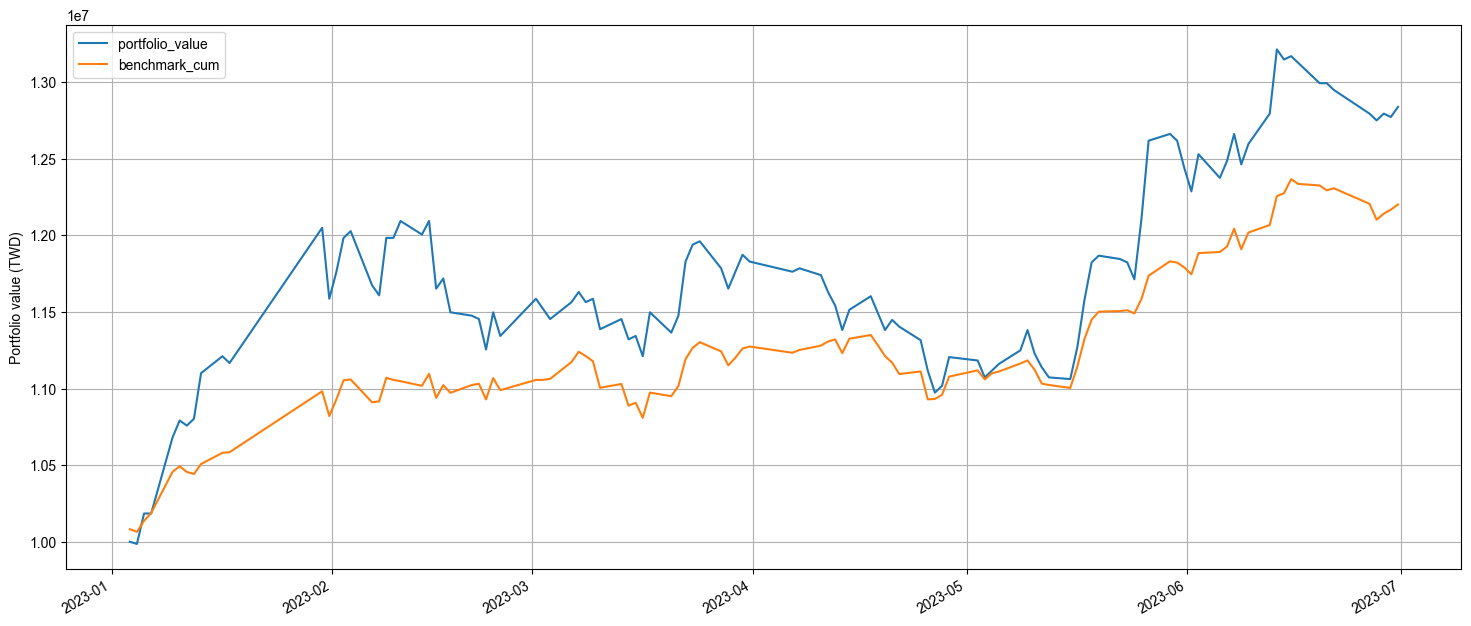

Start date,2023-01-03
End date,2023-06-30
Total months,5
,Backtest
Annual return,74.597%
Cumulative returns,28.39%
Annual volatility,26.028%
Sharpe ratio,2.27
Calmar ratio,8.05
Stability,0.43
Max drawdown,-9.263%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.26,2023-02-10,2023-04-26,2023-05-25,69
1,3.85,2023-01-30,2023-01-31,2023-02-10,10
2,3.51,2023-06-13,2023-06-27,NaT,NaN
3,2.96,2023-05-29,2023-06-01,2023-06-12,11
4,0.39,2023-01-16,2023-01-17,2023-01-30,3


Top 10 long positions of all time,max
sid,
2330,99.48%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2330,99.48%


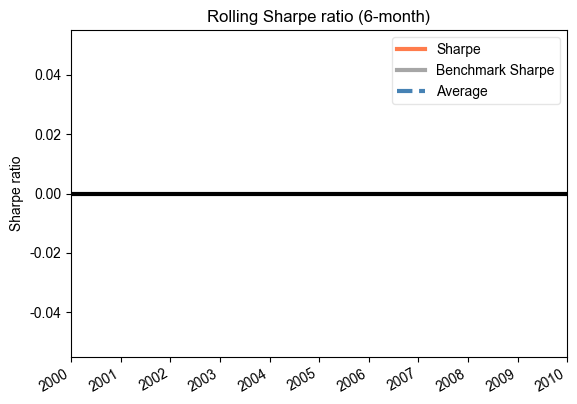

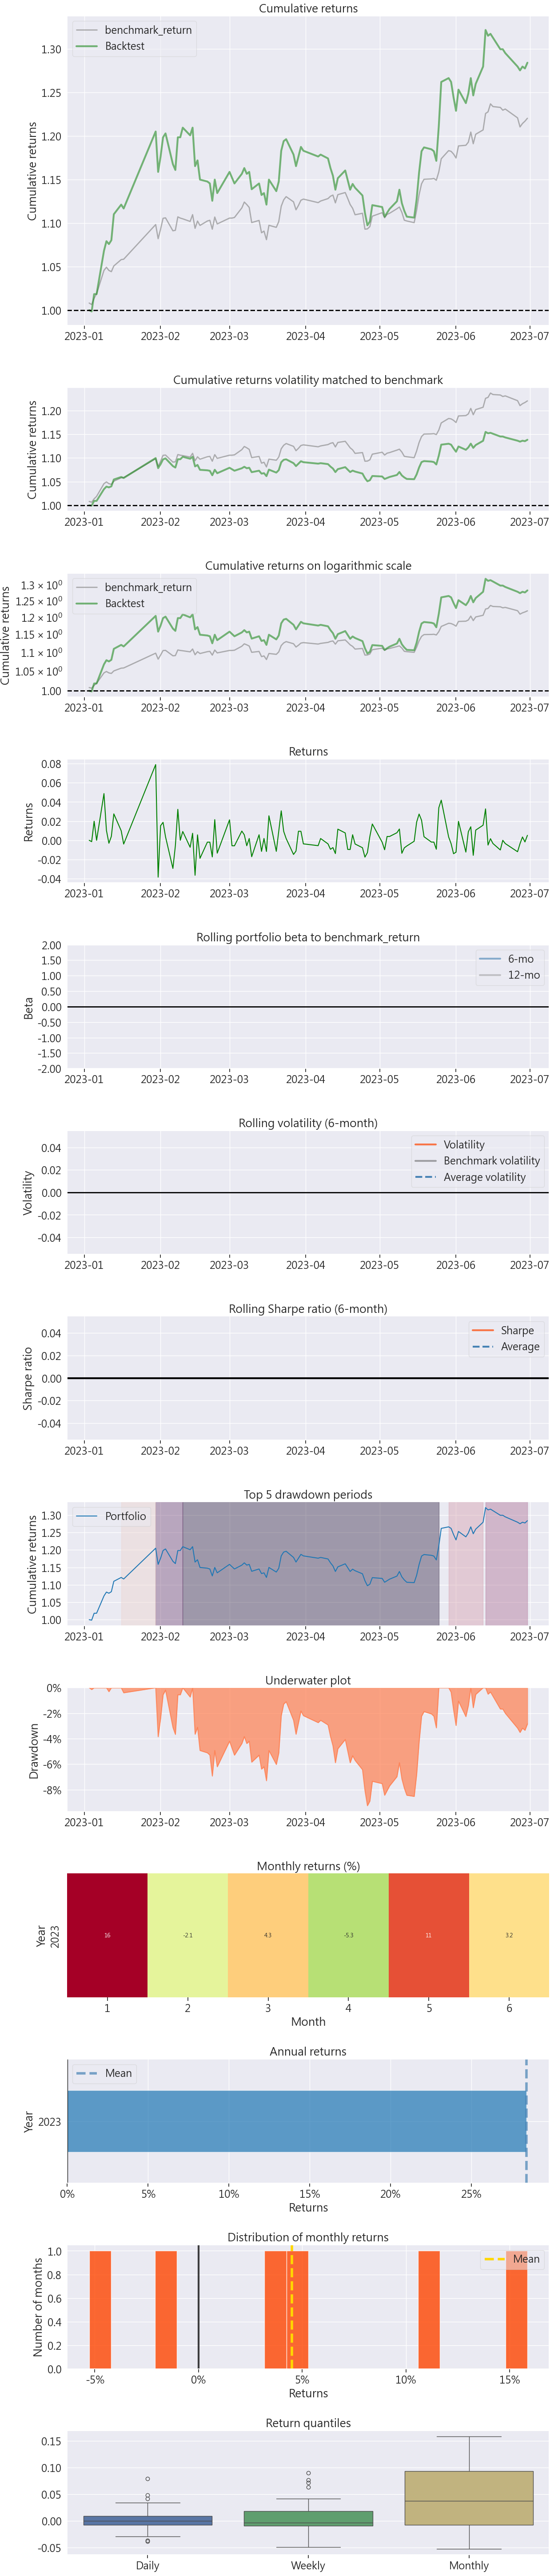

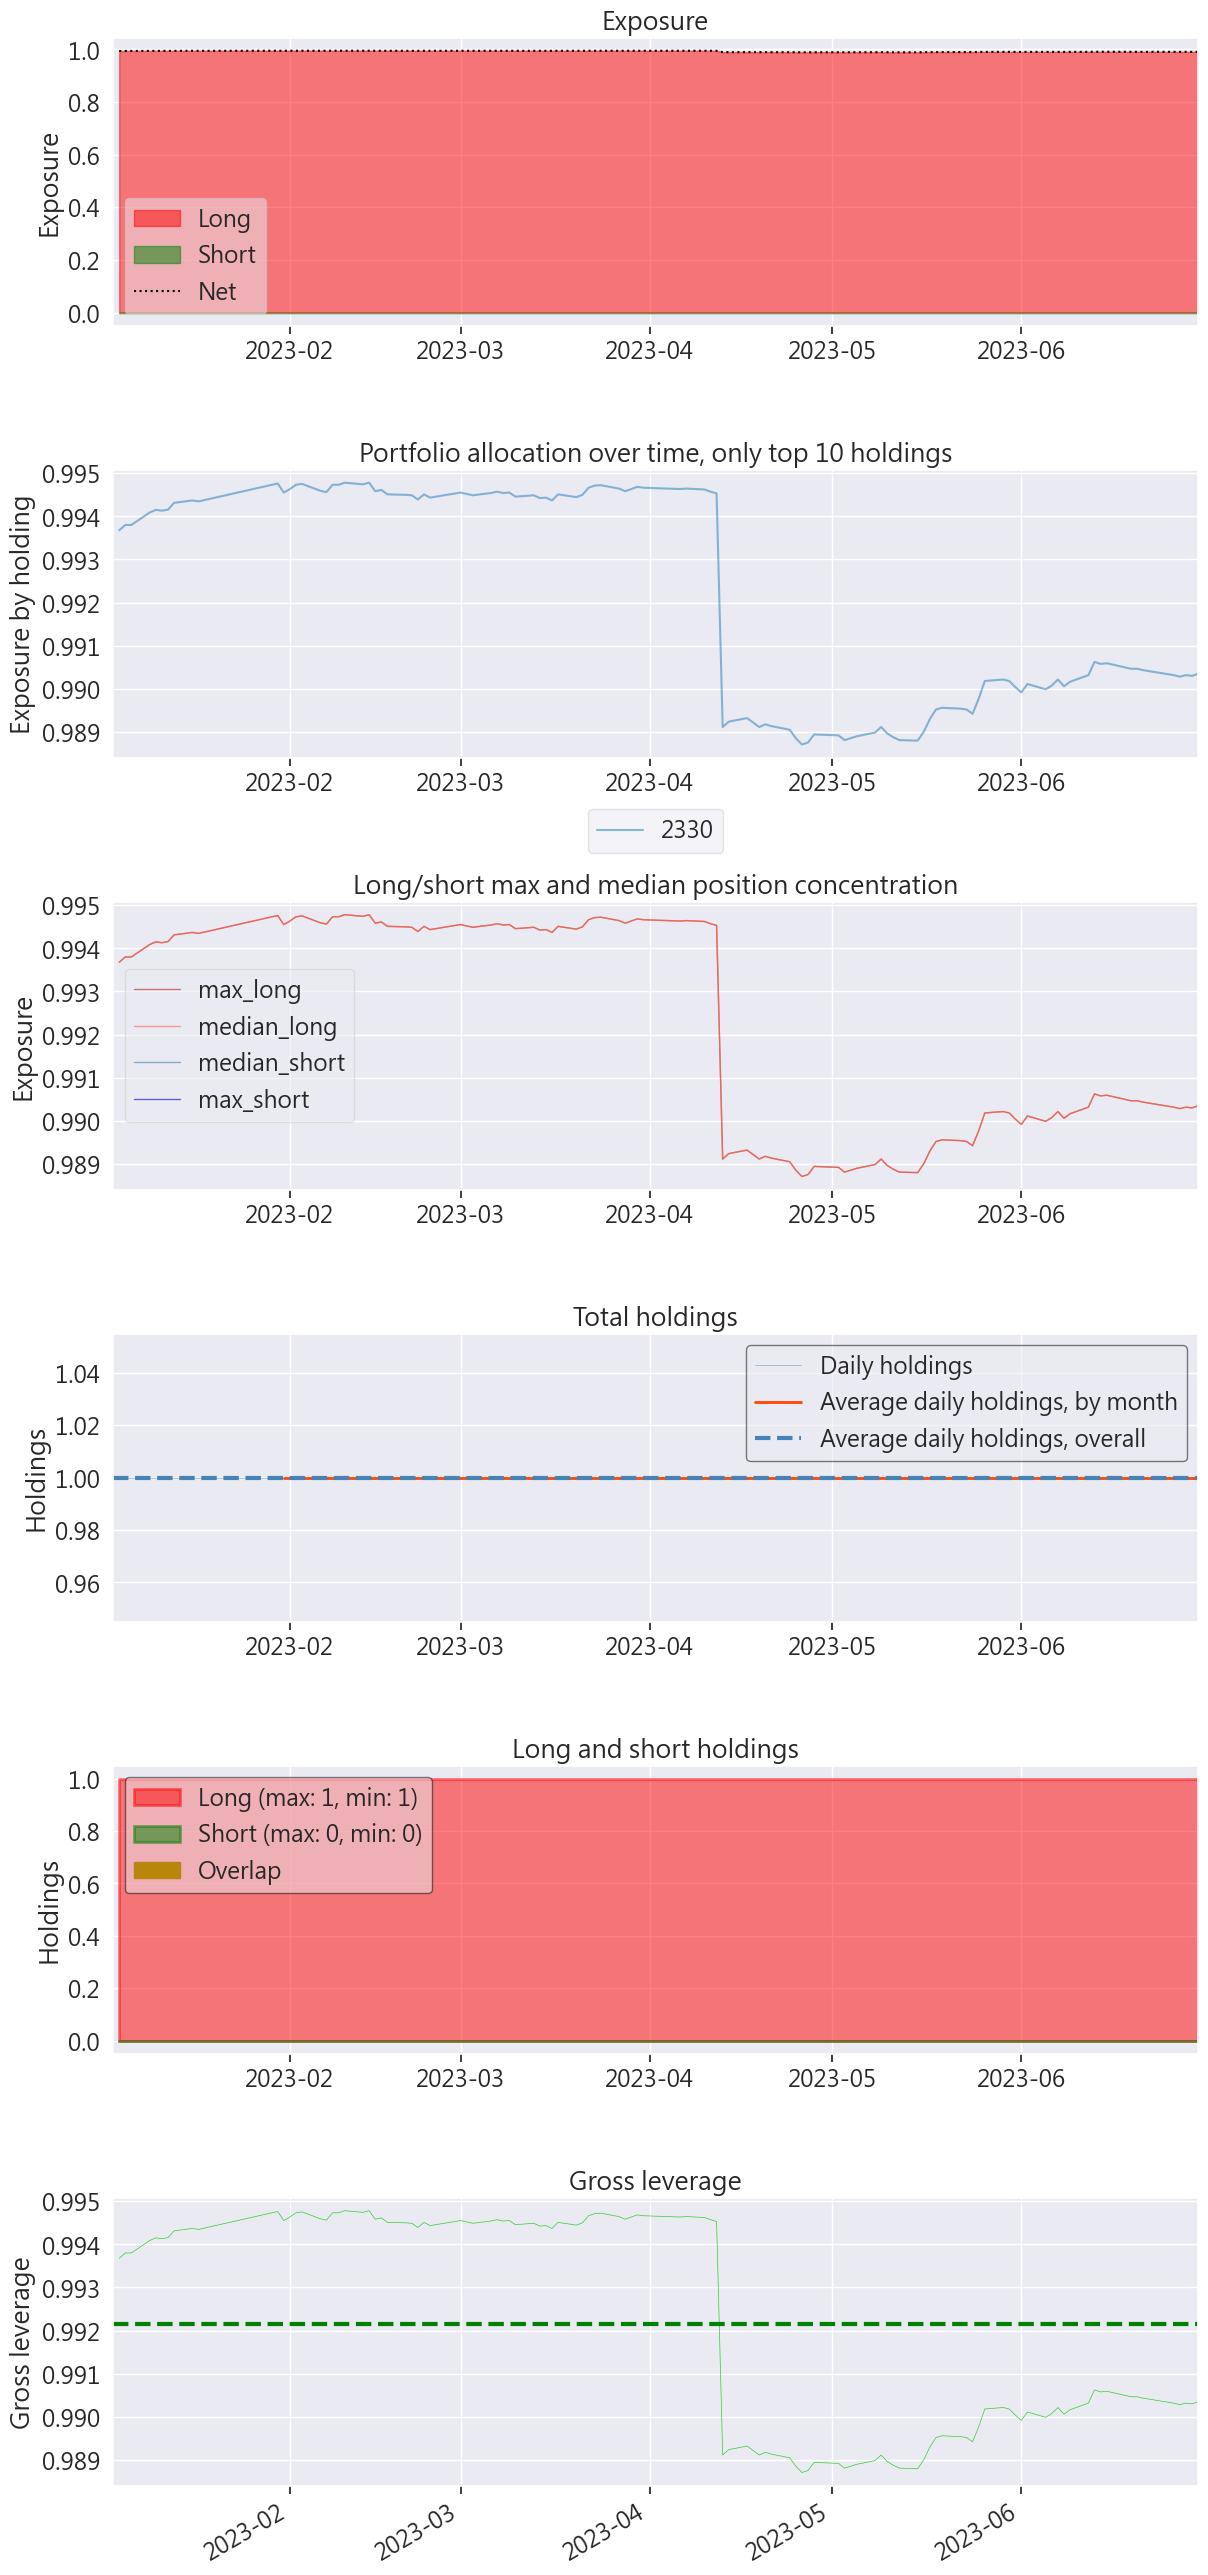

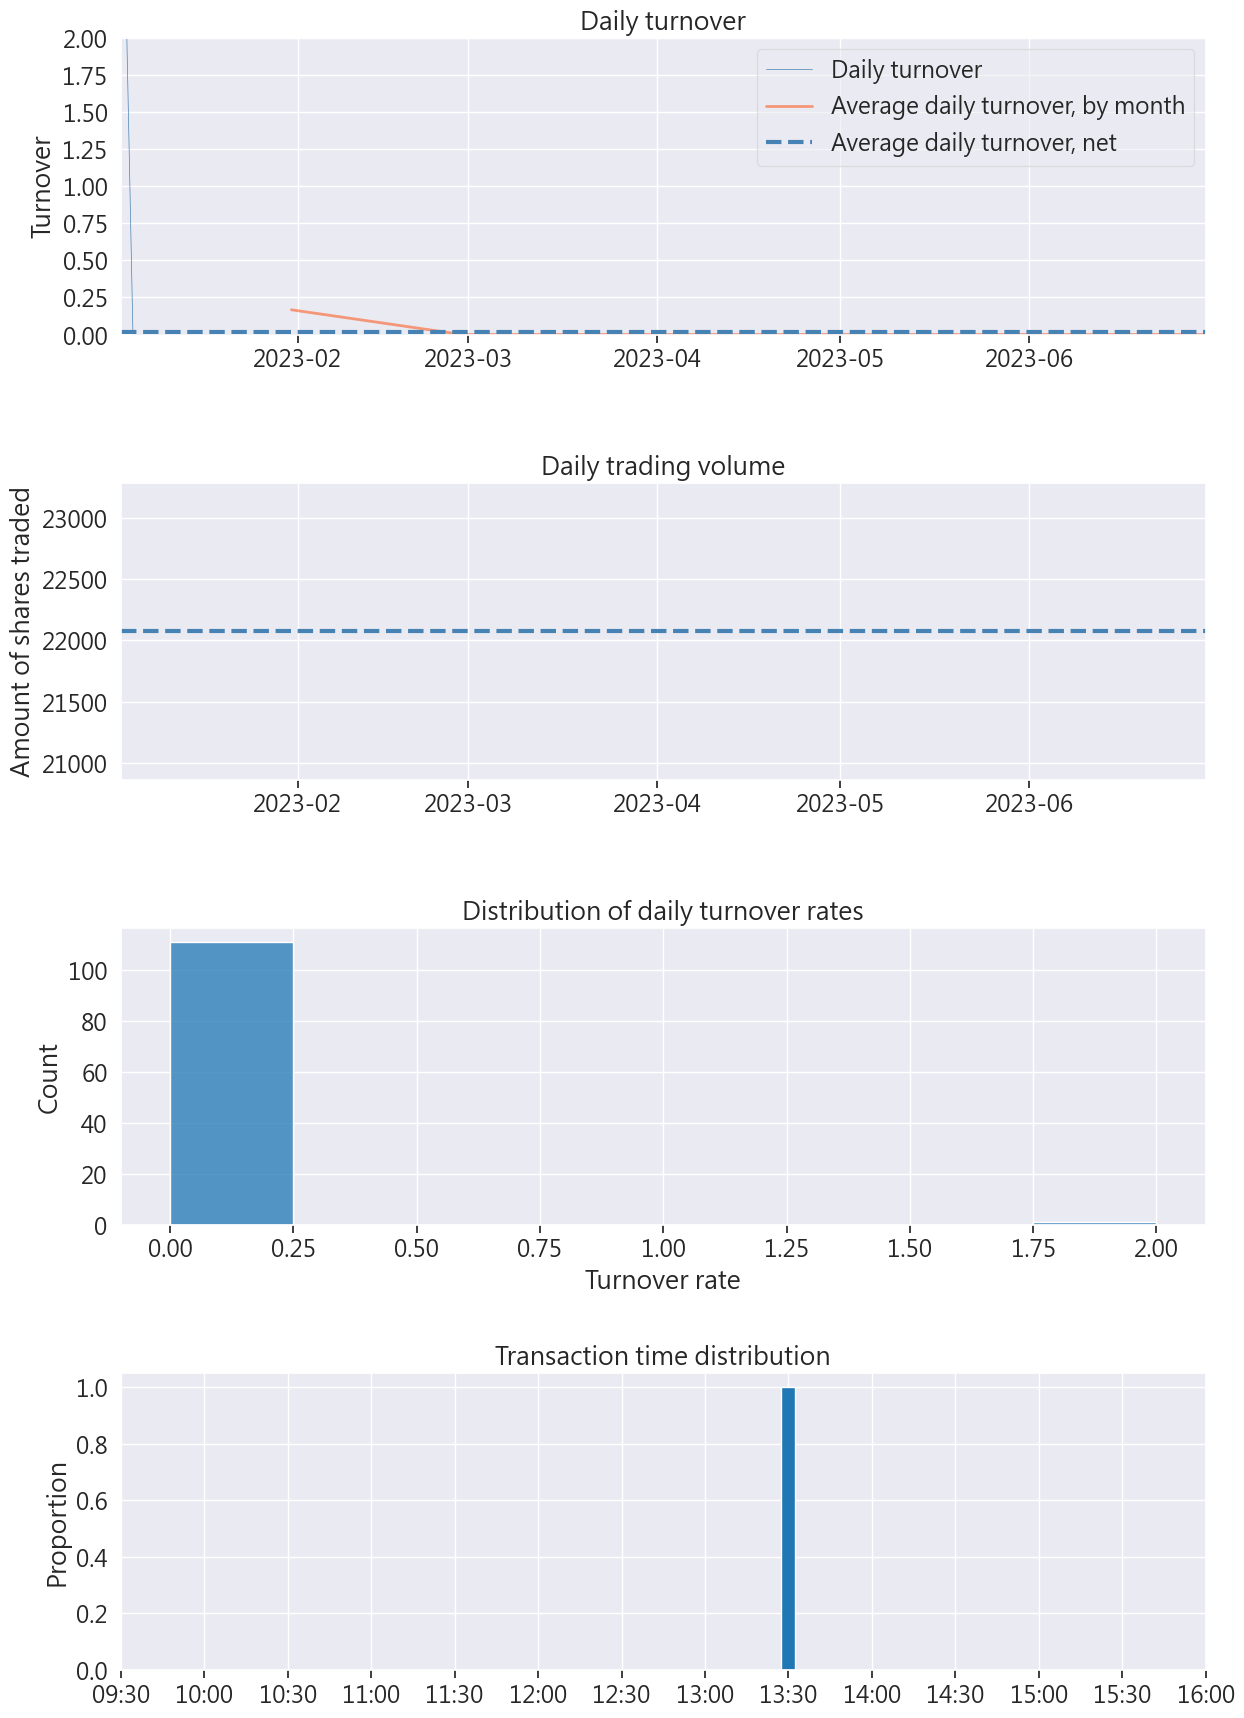

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定回測起訖時間與股票代碼
start = '2023-01-01'
end = '2023-06-30'
tickers = ['2330']
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
  context.day = 0
  context.tickers = tickers
  set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
  set_benchmark(symbol('IR0001'))

def handle_data(context, data):

  # 回測第一天買進
  if context.day == 0:
    for ticker in context.tickers:
      order_percent(symbol(ticker), 1 / len(tickers))

  context.day += 1  # 以免重複買進

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')



capital_base = 1e7  # 設定初始資金

def analyze(context, results):

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
  results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
  ax1.set_ylabel('Portfolio value (TWD)')

  plt.legend(loc = 'upper left')

  plt.gcf().set_size_inches(18, 8)
  plt.grid()
  plt.show()

from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

# Sharpe ratio夏普比率
from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,

          factor_returns=benchmark_rets)

# 繪製圖表
pyfolio.tears.create_full_tear_sheet(returns=returns,
                  positions=positions,
                  transactions=transactions,
                  benchmark_rets=benchmark_rets
                  )